# Testes com Rede Neural

Load

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

def plot_history(h):
    loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in h.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in h.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Custo não está presente no histórico')
        return
    epochs = range(1, len(h.history[loss_list[0]]) + 1)
    print(epochs)
    # Custo
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Custo [treinamento] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Custo [validação] (' + str(str(format(
                    h.history[l][-1],'.5f'))+')'))
    plt.title('Custo')
    plt.xlabel('Épocas')
    plt.ylabel('Custo')
    plt.legend()
    # Acurácia
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, h.history[l], 'b',
                 label='Acurácia [treinamento] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    for l in val_acc_list:
        plt.plot(epochs, h.history[l], 'g',
                 label='Acurácia [validação] (' + str(format(
                    h.history[l][-1],'.5f'))+')')
    plt.title('Acurácia')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.show()

# protocol = ['Flexão de punho', 'Extensão de punho', 'Pinça', 'Segurar cartão', 'Segurar caneta', 'Segurar esfera', 'Segurar copo', 'Gancho']
protocol = [0,1,2,3,4,5,6,7]

voluntarios = dict()
for v in range(10):
    voluntarios[v] = np.load(f'./datasets/topicosCC-processed/vol{v}-selected.npy')

### Rede Neural

Epoch 1/100
18/18 [==============================] - 2s 18ms/step - loss: 2.0800 - accuracy: 0.1408 - val_loss: 1.9711 - val_accuracy: 0.2857
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 1.8864 - accuracy: 0.3267 - val_loss: 1.8251 - val_accuracy: 0.3782
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 1.7377 - accuracy: 0.4296 - val_loss: 1.6846 - val_accuracy: 0.4286
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 1.6035 - accuracy: 0.4964 - val_loss: 1.5632 - val_accuracy: 0.5000
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 1.4763 - accuracy: 0.5560 - val_loss: 1.4556 - val_accuracy: 0.5462
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 1.3644 - accuracy: 0.5830 - val_loss: 1.3605 - val_accuracy: 0.6261
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 1.2598 - accuracy: 0.6390 - val_loss: 1.2758 - val_accuracy: 0.6176
Epoch 8/100


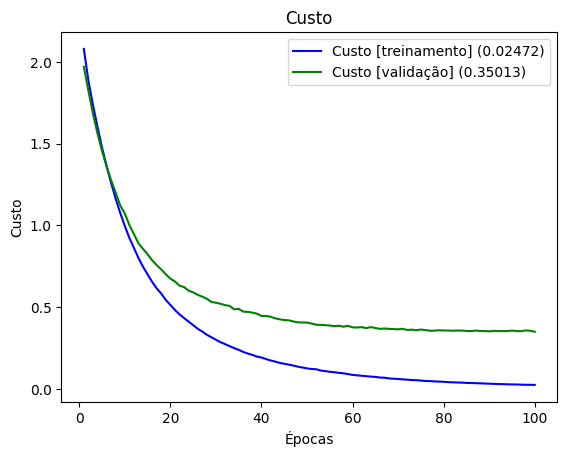

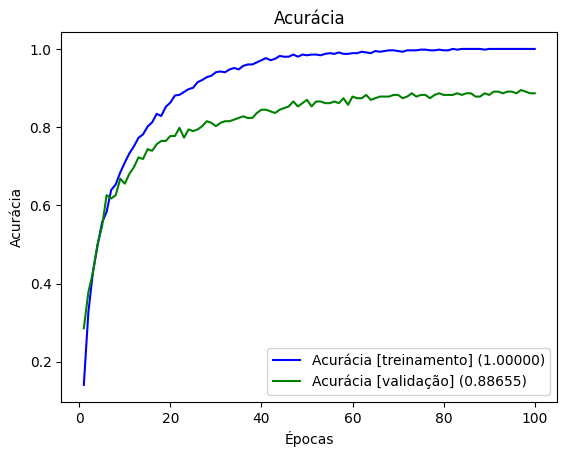

8/8 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8866
Voluntario 5
Loss: 0.35012945532798767
Accuracy: 0.8865545988082886


In [10]:
from sklearn.preprocessing import StandardScaler

def testRNA(v, epocas):
    #load
    x = StandardScaler().fit_transform(voluntarios[v])
    y = np.repeat(protocol, 99, axis=None)

    #divide
    y = to_categorical(y,  num_classes=len(protocol))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    #create model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    #test
    history = model.fit(X_train, y_train, epochs=epocas, batch_size=32, validation_data=(X_test, y_test))
    plot_history(history)

    #result
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Voluntario {v}')
    print("Loss:", loss)
    print("Accuracy:", accuracy)
#end rna

testRNA(5, 100)